# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
data = pd.read_csv('wine_clustered (1).csv')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,1
159,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
160,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
161,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# Separate features and target
X = data.drop(columns=['cluster'])  # Features
y = data['cluster']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

## RandomForestClassifier
Random forests are versatile classifiers that often perform well with minimal tuning.

In [ ]:
# Initialize a classifier, e.g., Random Forest
clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)

* RandomForestClassifier: This is a machine learning model from Scikit-Learn’s ensemble module that builds a collection of decision trees to make predictions. In a random forest, multiple trees are trained on different subsets of the data, and their predictions are averaged (in regression) or combined through a majority vote (in classification).
* random_state=42: Setting a random state ensures the results are reproducible. The same data splits and random selections will occur each time the code runs.
* n_estimators=100: This parameter specifies the number of decision trees in the forest. More trees generally improve the performance but increase computational time.
* max_depth=10: Limits the depth (or number of levels) of each decision tree to 10. This helps control overfitting by preventing the trees from becoming too complex, as very deep trees may capture noise rather than meaningful patterns in the data.

In [ ]:
# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

## **b. Evaluasi Model Klasifikasi**

In [ ]:
# Make predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [ ]:
# Calculate accuracy and F1 score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Training F1-Score:", train_f1)
print("Testing F1-Score:", test_f1)

Training Accuracy: 1.0
Testing Accuracy: 0.9591836734693877
Training F1-Score: 1.0
Testing F1-Score: 0.9586879286127407


In [ ]:
# Classification report (Precision, Recall, F1-score per class)
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.86      0.92        14
           2       1.00      1.00      1.00        17

    accuracy                           0.96        49
   macro avg       0.97      0.95      0.96        49
weighted avg       0.96      0.96      0.96        49



In [ ]:
# Check if accuracy and F1-score meet the 87% threshold
if train_accuracy >= 0.87 and test_accuracy >= 0.87 and train_f1 >= 0.87 and test_f1 >= 0.87:
    print("Model meets the performance criteria!")
else:
    print("Model needs further tuning.")

Model meets the performance criteria!


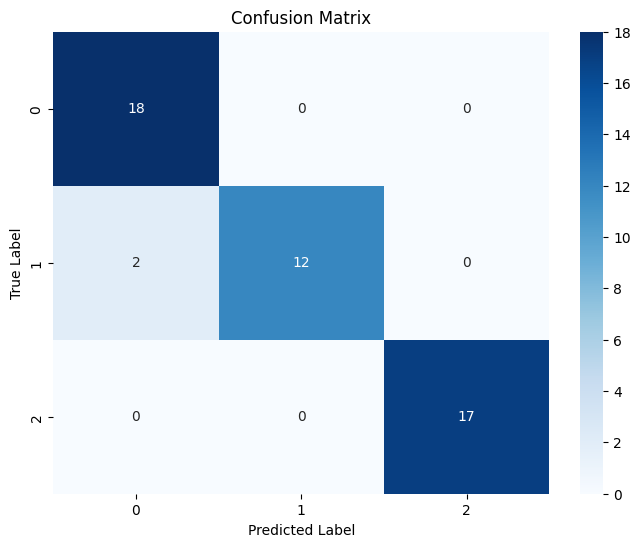

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berdasarkan confusion matrix dan classification report yang Anda berikan, kita dapat menarik beberapa kesimpulan:

* Akurasi: Model Anda mencapai akurasi sebesar 96%. Ini berarti model berhasil memprediksi kelas yang benar untuk 96% dari seluruh data.
* Presisi:
  * Kelas 0: Presisi sebesar 0.90 menunjukkan bahwa dari semua prediksi yang diklasifikasikan sebagai kelas 0, 90% benar-benar termasuk dalam kelas 0.
  * Kelas 1: Presisi sebesar 1.00 menunjukkan bahwa semua prediksi yang diklasifikasikan sebagai kelas 1 benar-benar termasuk dalam kelas 1. Ini adalah hasil yang sangat baik.
  * Kelas 2: Presisi sebesar 1.00 menunjukkan bahwa semua prediksi yang diklasifikasikan sebagai kelas 2 benar-benar termasuk dalam kelas 2. Ini juga merupakan hasil yang sangat baik.
* Recall:
  * Kelas 0: Recall sebesar 1.00 menunjukkan bahwa model berhasil mengidentifikasi semua sampel yang sebenarnya termasuk dalam kelas 0.
  * Kelas 1: Recall sebesar 0.86 menunjukkan bahwa model hanya berhasil mengidentifikasi 86% dari sampel yang sebenarnya termasuk dalam kelas 1.
  * Kelas 2: Recall sebesar 1.00 menunjukkan bahwa model berhasil mengidentifikasi semua sampel yang sebenarnya termasuk dalam kelas 2.
* F1-score: F1-score adalah rata-rata harmonik antara presisi dan recall. Nilai F1-score yang tinggi menunjukkan bahwa model memiliki baik presisi maupun recall yang baik.

## Kesimpulan

Secara keseluruhan, model klasifikasi Anda menunjukkan performa yang sangat baik, terutama untuk kelas 0 dan 2. Model berhasil mengklasifikasikan sebagian besar data dengan benar. Namun, ada sedikit ruang untuk perbaikan dalam mengidentifikasi kelas 1.

## Rekomendasi

* Analisis lebih lanjut: Cobalah untuk memahami mengapa model kesulitan mengidentifikasi kelas 1. Apakah ada karakteristik khusus pada data kelas 1 yang membuat model sulit membedakannya dengan kelas lain?
* Balancing data: Jika distribusi data antar kelas tidak seimbang, pertimbangkan untuk melakukan teknik balancing data seperti oversampling atau undersampling.
* Mencoba algoritma lain: Anda bisa mencoba algoritma klasifikasi lain untuk melihat apakah ada peningkatan performa.
* Tuning hyperparameter: Sesuaikan hyperparameter dari algoritma yang Anda gunakan untuk mendapatkan hasil yang lebih baik.